In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.signal import find_peaks, convolve, medfilt
from scipy.optimize import curve_fit
import matplotlib as mpl
from glob import glob
from copy import copy

%matplotlib widget

In [2]:
freqs, dark_s21 = np.load('./S21s/VNAsweep.npy')
M_pxs = 11
N_pxs = 11

In [3]:
sw = 4 # even number
mph = 0.05
window = np.ones(sw)/sw
smooth_s21 = convolve(dark_s21, window, mode='same')
ds21 = np.diff(smooth_s21, 1)
smooth_ds21 = convolve(ds21, window, mode='same')
d2s21 = np.diff(smooth_ds21, 1)

locs, props = find_peaks(d2s21, height=mph, prominence=mph)
heights = props['peak_heights']

f0s = freqs[locs]
s21_mins = dark_s21[locs]

121


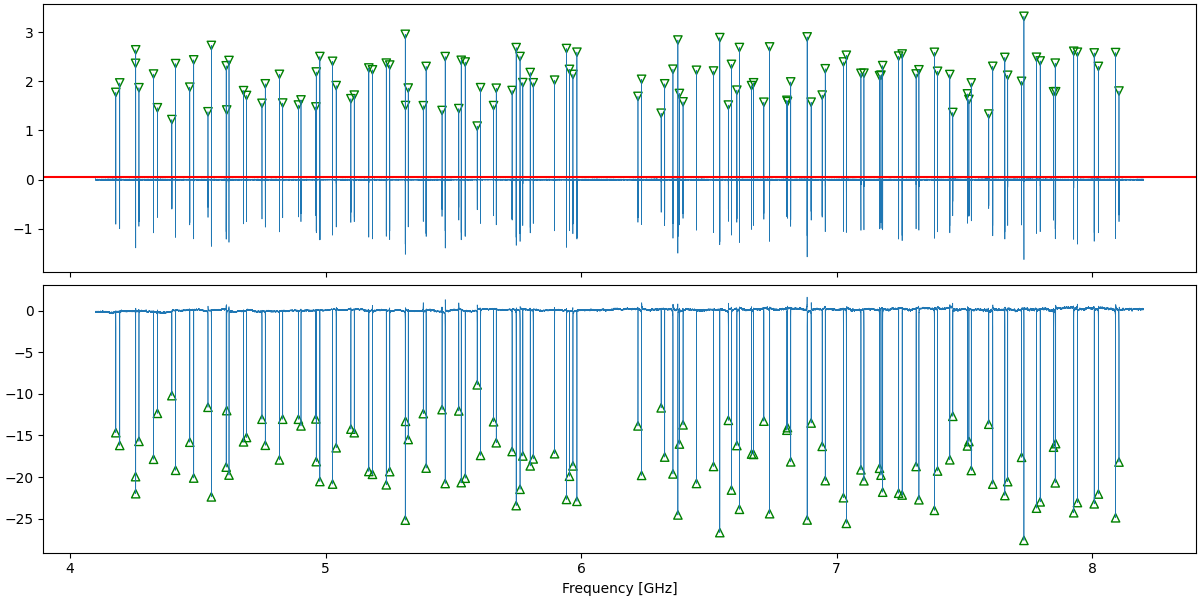

In [4]:
fig, ax = plt.subplot_mosaic('a;b', sharex=True, figsize=(12, 6), constrained_layout=True)
ax['a'].plot(freqs[:-2], d2s21, lw=.5)
ax['b'].plot(freqs, dark_s21, lw=.5)
ax['a'].axhline(mph, c='r')

ax['a'].scatter(freqs[:-2][locs], heights, marker='v', c='None', edgecolor='g')
ax['b'].scatter(f0s, s21_mins, marker='^', c='None', edgecolor='g')
ax['b'].set_xlabel('Frequency [GHz]')
print(len(locs))

In [5]:
files = glob('./S21s/*_*.npy')
print(files)
nr_steps = len(files)
nr_kids = len(locs)
s21s = np.empty((nr_steps, nr_kids))
s21s[:] = np.nan
s0 = dark_s21[locs]
for i, file in enumerate(files):
    f, s21 = np.load(file)
    s21s[i, :]  = s21[locs] - s0 

['./S21s\\S21_x545y1120_w2.npy', './S21s\\S21_x551y1120_w2.npy', './S21s\\S21_x558y1120_w2.npy', './S21s\\S21_x565y1120_w2.npy', './S21s\\S21_x572y1120_w2.npy', './S21s\\S21_x578y1120_w2.npy', './S21s\\S21_x585y1120_w2.npy', './S21s\\S21_x592y1120_w2.npy', './S21s\\S21_x598y1120_w2.npy', './S21s\\S21_x605y1120_w2.npy', './S21s\\S21_x612y1120_w2.npy']


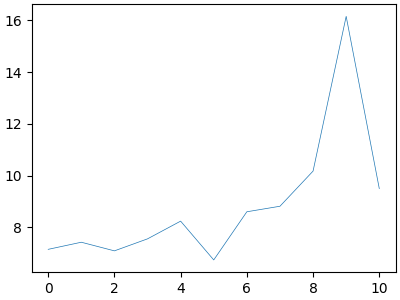

In [6]:
kid = 120
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
ax.plot(s21s[:, kid], lw=.5)

(array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

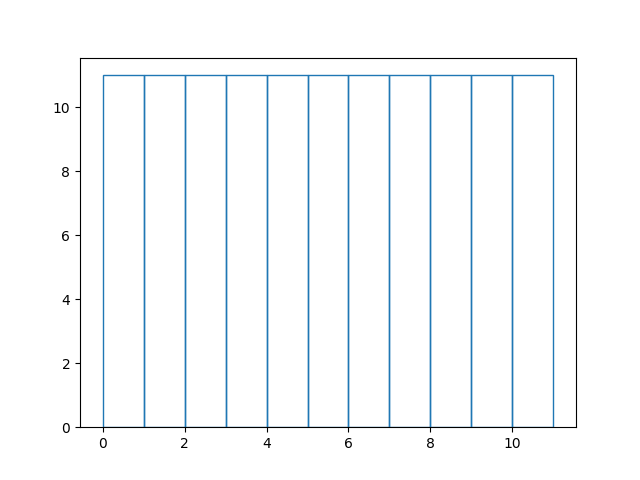

In [7]:
pos = np.empty((nr_kids, 4))
pos[:] = np.nan
pos[:, 0] = np.arange(nr_kids, dtype=int)
pos[:, 1] = locs
pos[:, 2] = f0s
for i in range(nr_kids):
    pos[i, 3] = np.nanargmax(s21s[:, i])
fig, ax = plt.subplots()
ax.hist(pos[:, 3], bins=np.arange(nr_steps+1), facecolor='None', edgecolor='tab:blue')

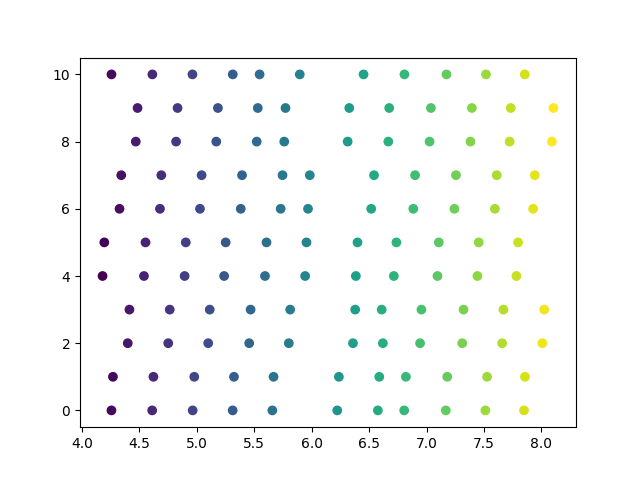

In [8]:
fig, ax = plt.subplots()
ax.scatter(pos[:, 2], pos[:, 3], c=pos[:, 2])

In [9]:
rows = [[] for _ in range(nr_steps)]
for i in pos:
    rows[int(i[-1])].append(int(i[0]))
kids = np.array(rows)  
kids

array([[  2,  13,  25,  35,  47,  60,  71,  79,  90, 101, 112],
       [  4,  15,  26,  37,  48,  61,  72,  81,  92, 103, 114],
       [  7,  18,  29,  40,  53,  64,  74,  84,  95, 106, 117],
       [  8,  19,  30,  41,  54,  65,  73,  85,  96, 107, 118],
       [  0,  11,  22,  33,  45,  56,  66,  77,  88,  99, 110],
       [  1,  12,  23,  34,  46,  57,  67,  78,  89, 100, 111],
       [  5,  16,  27,  38,  49,  58,  69,  82,  93, 104, 115],
       [  6,  17,  28,  39,  50,  59,  70,  83,  94, 105, 116],
       [  9,  20,  31,  42,  51,  62,  75,  86,  97, 108, 119],
       [ 10,  21,  32,  43,  52,  63,  76,  87,  98, 109, 120],
       [  3,  14,  24,  36,  44,  55,  68,  80,  91, 102, 113]])

In [10]:
kid_id_board_full = np.load('KID_ID_BOARD_32x32.npy').astype(int)
kid_id_board_full


array([[   0,   32,   64, ...,  928,  960,  992],
       [ 673,  705,  737, ...,  577,  609,  641],
       [ 322,  354,  386, ...,  226,  258,  290],
       ...,
       [  61,   93,  125, ...,  989, 1021,   29],
       [ 734,  766,  798, ...,  638,  670,  702],
       [ 383,  415,  447, ...,  287,  319,  351]])

In [11]:
kid_id_board_full_derolled = copy(kid_id_board_full)
for i, row in enumerate(kid_id_board_full):
    kid_id_board_full_derolled[i] = np.roll(row, i*21)
kid_id_board_full_derolled

array([[   0,   32,   64, ...,  928,  960,  992],
       [   1,   33,   65, ...,  929,  961,  993],
       [   2,   34,   66, ...,  930,  962,  994],
       ...,
       [  29,   61,   93, ...,  957,  989, 1021],
       [  30,   62,   94, ...,  958,  990, 1022],
       [  31,   63,   95, ...,  959,  991, 1023]])

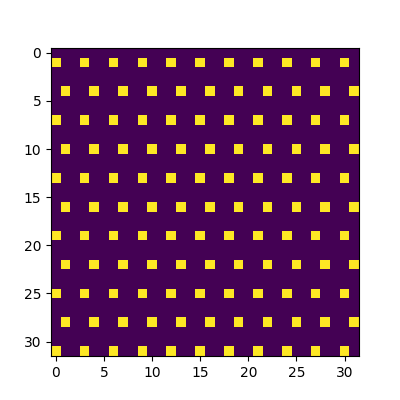

In [12]:
size = 32
mask = np.zeros((size, size), dtype=bool)
count = 0
x = -1
y = -1
for i in range(size):
    if (i+2) % 3 == 0:
        y += 1        
        offset = y % 2
        for j in range(size):
            if (j-offset) % 3 == 0:
                x += 1           
                mask[i, j] = 1
        x = -1

fig, ax = plt.subplots(figsize=(4,4))  
ax.imshow(mask)

In [13]:
mask_derolled = copy(mask)
for i, row in enumerate(mask):
    mask_derolled[i] = np.roll(row, i*21)

In [14]:
kid_id_board = kid_id_board_full_derolled[mask_derolled].reshape((M_pxs, N_pxs))  
kid_id_board
# np.save('kid_id_board_11x11.npy', kid_id_board)

array([[  33,  129,  225,  321,  417,  513,  609,  673,  769,  865,  961],
       [  36,  132,  228,  324,  420,  516,  612,  676,  772,  868,  964],
       [  71,  167,  263,  359,  455,  551,  615,  711,  807,  903,  999],
       [  74,  170,  266,  362,  458,  554,  618,  714,  810,  906, 1002],
       [  13,  109,  205,  301,  397,  493,  557,  653,  749,  845,  941],
       [  16,  112,  208,  304,  400,  496,  560,  656,  752,  848,  944],
       [  51,  147,  243,  339,  435,  499,  595,  691,  787,  883,  979],
       [  54,  150,  246,  342,  438,  502,  598,  694,  790,  886,  982],
       [  89,  185,  281,  377,  441,  537,  633,  729,  825,  921, 1017],
       [  92,  188,  284,  380,  444,  540,  636,  732,  828,  924, 1020],
       [  31,  127,  223,  319,  383,  479,  575,  671,  767,  863,  959]])

array([4.1       , 4.1035225 , 4.10704501, ..., 7.89295499, 7.8964775 ,
       7.9       ])

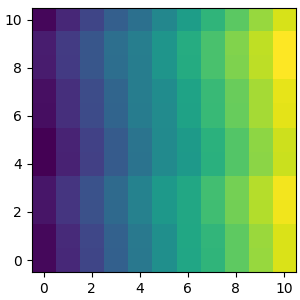

In [15]:
# kid_id_board = np.load('kid_id_board_32x32.npy').astype(int)
finger_lengths = np.round(np.load('LT361_4-8GHz_1024px_fingers.npy'),3) 
design_f0s = np.load('LT361_4-8GHz_1024px_F0s.npy')*1e-9
coupler_lengths = np.load('LT361_4-8GHz_1024px_couplers.npy')
fig, ax = plt.subplot_mosaic('a', figsize=(3,3), constrained_layout=True, sharey=True)   
ax['a'].imshow(kid_id_board, cmap='viridis', origin='lower')
design_f0s

In [17]:
master_array = np.empty((1024, 10)) # columns: idx, row, col, design finger, design couplers, design f0, meas f0, nibble design f0, nibble finger, nibble meas f0
master_array[:] = np.nan  
master_array[:,0] = np.arange(1024)  
master_array[:,3] = finger_lengths
master_array[:,4] = coupler_lengths
master_array[:,5] = design_f0s
for i, row in enumerate(mask):
    for j, bool in enumerate(row):
        idx = kid_id_board_full[i, j]
        master_array[idx, 1] = i
        master_array[idx, 2] = j
        if bool:  
            meas_coord = np.argwhere(kid_id_board == idx)[0] 
            meas_idx = kids[meas_coord[0], meas_coord[1]]  
            if ~np.isnan(meas_idx):
                meas_f = f0s[int(meas_idx)]
                master_array[idx, 6] = meas_f
design = master_array[:, 5]
meas = master_array[:, 6]
nanmask = np.isnan(meas)
sort_idx = np.argsort(meas[~nanmask])
inverse_sort_idx = np.argsort(sort_idx)

In [21]:
# Define column headers
headers = "idx, row, col, L_finger, L_coupler, f0_design, f0_meas, f0_design_nibble, L_finger_nibble, f0_meas_nibble"

# Save the master_array as a text file with headers
np.savetxt("LT361w2chip7_master.txt", master_array, header=headers, comments='', fmt='%.6e', delimiter=',')

line
0.0010722716537331673


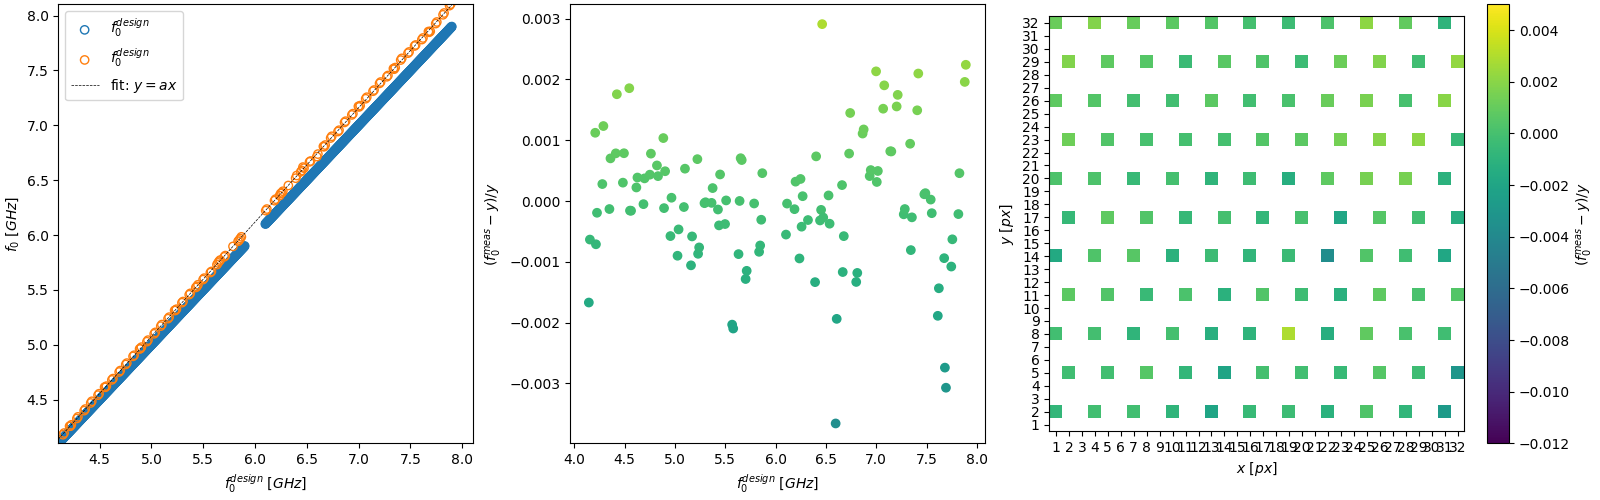

In [42]:
def linear(x, a, b):
    return a*x+b

def secorder(x, a, b, c):
    return a*x**2+b*x

size=32

line = linear
popt, pcov = curve_fit(line, design[~nanmask], meas[~nanmask])
design_fit = line(design, *popt)
df_f_fit = (meas - design_fit) / design_fit
df_f_map = df_f_fit[kid_id_board]
df_f_map_full = np.empty((size, size))  
df_f_map_full[:] = np.nan
df_f_map_full[mask] = df_f_map.flatten()
flim = np.array([np.nanmin((design, meas)), np.nanmax((design, meas))])

if line:
    if line == linear:
        eq = 'y=ax'
        save = 'fit_linear'
    elif line == secorder:
        eq = 'y=ax^2+bx'
        save = 'fit_secorder'
    print('line')
    popt, pcov = curve_fit(line, design[~nanmask], meas[~nanmask])
    fit = line(design, *popt)
    xfit = np.linspace(flim[0], flim[1])
    yfit = line(xfit, *popt)
    label = 'y'
else:
    fit = design
    label = 'f_0^{design}'
    save = 'nofit'

fig, ax = plt.subplot_mosaic('abc', figsize=(16, 5), constrained_layout=True)
ax['a'].scatter(design, design, c='None', edgecolor='tab:blue', label='$\it f_0^{design}$')
ax['a'].scatter(design, meas, c='None', edgecolor='tab:orange', label='$\it f_0^{design}$')
if line:
    ax['a'].plot(xfit, yfit, c='k', label='fit: $%s$' % eq, ls='--', lw=0.5)
ax['a'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
ax['a'].set_ylabel('$\it f_0$ $[GHz]$')
ax['a'].set_xlim(flim)
ax['a'].set_ylim(flim)
ax['a'].legend(loc='upper left')
clim = [-.012, .005]
ax['b'].scatter(design, df_f_fit, c=df_f_fit, vmin=clim[0], vmax=clim[1], label='residual, $f_0-y_2$')
# for i, x in enumerate(design):
#     ax['b'].annotate(i, (x, df_f_corr[i]), fontsize=8, ha='center', va='center')
ax['b'].annotate
ax['b'].set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
ax['b'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
im = ax['c'].imshow(df_f_map_full, cmap='viridis', origin='lower', vmin=clim[0], vmax=clim[1])
# for i, x in enumerate(df_f_map_full):
#     for j, y in enumerate(x):
#         if ~np.isnan(y):
#             old_id = kid_id_board_full[i, j]
#             new_id = kids[i, j]
#             if old_id == new_id:
#                 c = 'w'
#             else:
#                 c = 'r'
#             ax['c'].text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color=c)
# Major ticks
ax['c'].set_xticks(np.arange(0, size, 1))
ax['c'].set_yticks(np.arange(0, size, 1))
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, size+1, 1))
ax['c'].set_yticklabels(np.arange(1, size+1, 1))
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
# _ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
print(np.nanstd(df_f_fit))
# fig, ax = plt.subplots()
# ax.scatter(pos[:, -1], df_f_corr[np.argsort(meas)])

In [47]:
master_array = np.loadtxt("LT361w2chip7_master.txt", delimiter=',', skiprows=1)
kid_id_board = np.load('kid_id_board_32x32.npy').astype(int)
f0 = master_array[:, 6]

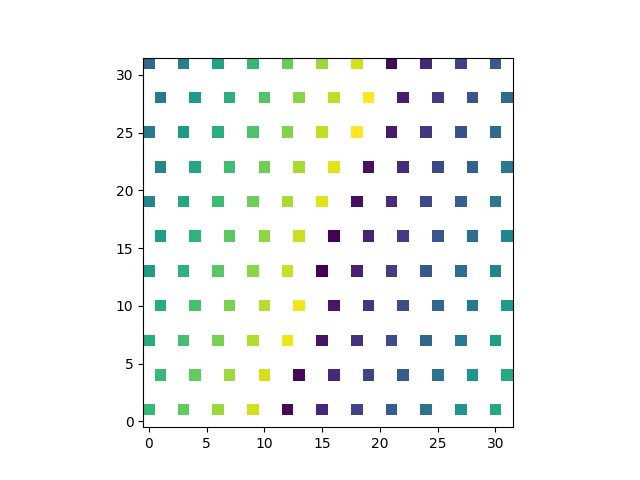

In [48]:
fig, ax = plt.subplots()
ax.imshow(f0[kid_id_board], cmap='viridis', origin='lower')